In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.preprocessing import image_dataset_from_directory

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
BASE_PATH = '/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/TB_Chest_Radiography_Database/'

TEST_DIR = BASE_PATH + 'test/'
COLOR_MODE = 'rgb'
IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_CHANNELS = 3
BATCH_SIZE = 128
BUFFER_SIZE = BATCH_SIZE*5

test_set = image_dataset_from_directory(TEST_DIR,
                                            labels='inferred', 
                                            label_mode='int',
                                            color_mode=COLOR_MODE,
                                            batch_size=BATCH_SIZE,
                                            image_size=(IMG_WIDTH, IMG_HEIGHT),
                                            seed=123)

Found 1400 files belonging to 2 classes.


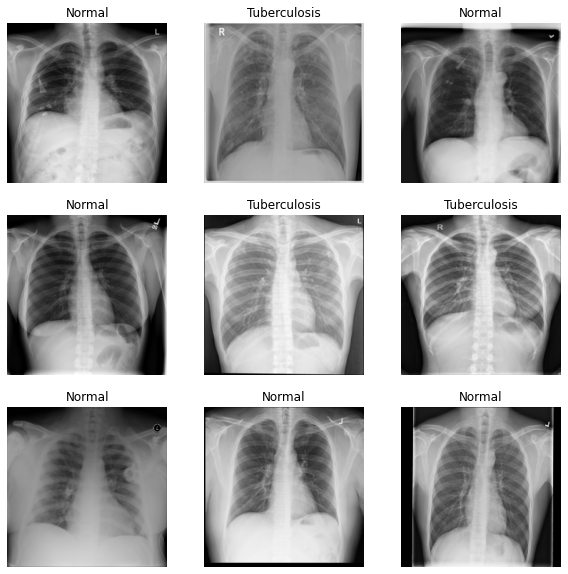

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        if int(labels[i]) == 1:
          plt.title("Tuberculosis")
        else:
          plt.title("Normal")
        plt.axis("off")

# 1. Load model

In [4]:
BASE_PATH = '/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Models/Models for TB Chest Radiograph/'

model1 = keras.models.load_model(BASE_PATH + 'model_vgg16.h5')
model2 = keras.models.load_model(BASE_PATH + 'model_efficientnet.h5')
model3 = keras.models.load_model(BASE_PATH + 'model_mobilenetv3.h5')
model4 = keras.models.load_model(BASE_PATH + 'model_dense.h5')
model5 = keras.models.load_model(BASE_PATH + 'model_regnet.h5')

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sn
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

def eval_model(model):
  acc = []
  precision = []
  recall = []
  cf = []
  f1 = []

  for img, label in test_set:
    y_pred = model.predict(img)
    y_pred = [1 if i > 0.5 else 0 for i in y_pred]
    acc.append(accuracy_score(label, y_pred))
    precision.append(precision_score(label, y_pred))
    recall.append(recall_score(label, y_pred))
    f1.append(f1_score(label, y_pred))
    cf.append(confusion_matrix(label, y_pred))

  print("Accuracy: " + str(np.mean(acc)))
  print("Precision: " + str(np.mean(precision)))
  print("Recall: " + str(np.mean(recall)))
  print("F1: " + str(np.mean(f1)))
  conf_matrix = np.sum(cf, axis=0)

  df_cm = pd.DataFrame(conf_matrix, index=['NORMAL', 'TUBECULOSIS'],
                       columns=['NORMAL', 'TUBERCULOSIS'])
  plt.figure(figsize=(10, 7))
  sn.set(font_scale=2)
  sn.heatmap(df_cm, annot=True, fmt='g')

### **Đánh giá mô hình 1 - Fine-tuning VGG16**

Accuracy: 0.9556344696969696
Precision: 0.9923770630813974
Recall: 0.9187634708784004
F1: 0.9539974054171072


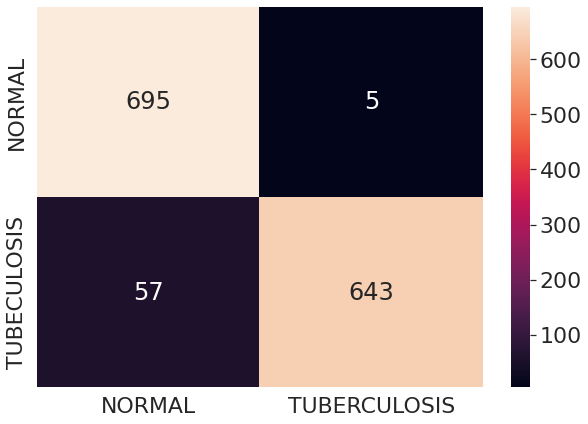

In [6]:
eval_model(model1)

### **Đánh giá mô hình 2 - EfficientNetB7**

Accuracy: 0.9565340909090909
Precision: 0.9967756662671916
Recall: 0.9172094830464264
F1: 0.954858653634703


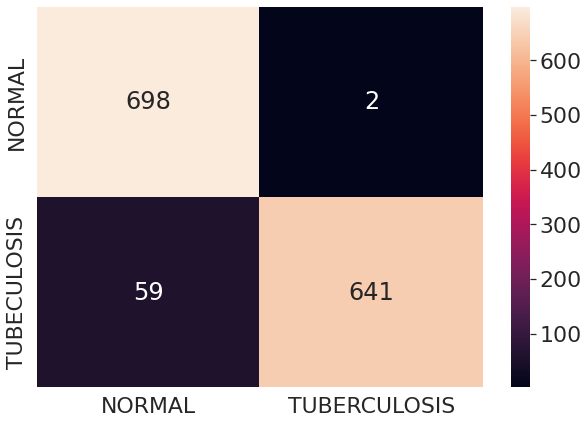

In [7]:
eval_model(model2)

### **Đánh gía mô hình 3 - MobileNetV3**

Accuracy: 0.9835227272727273
Precision: 0.9985795454545454
Recall: 0.9684133474961188
F1: 0.9831849023886594


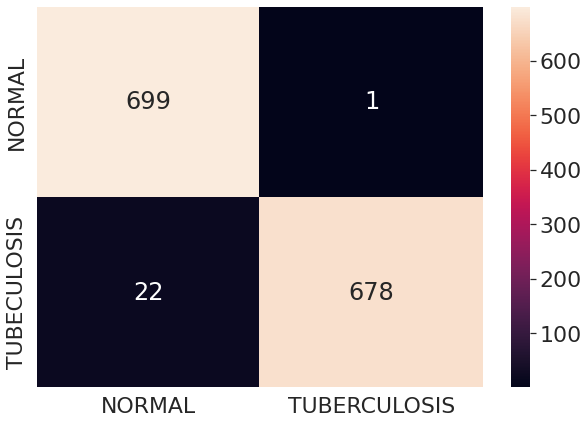

In [8]:
eval_model(model3)

### **Đánh giá mô hình 4 - DenseNet**

Accuracy: 0.9579545454545454
Precision: 0.9906542447410797
Recall: 0.9233791442393159
F1: 0.9555825908962592


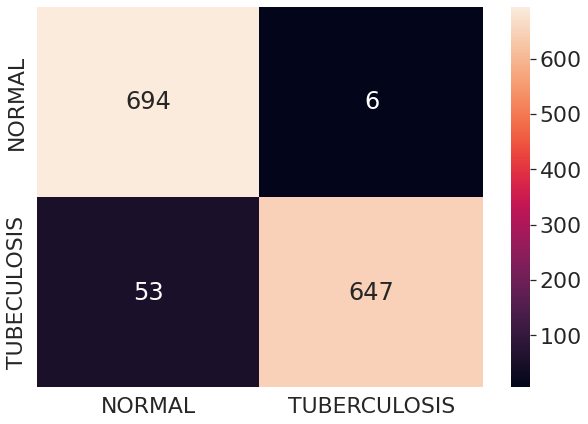

In [9]:
eval_model(model4)

### **Đánh giá mô hình 5 - RegNet**

Accuracy: 0.9665246212121211
Precision: 0.9970757497777569
Recall: 0.9361061149113928
F1: 0.9654682621453656


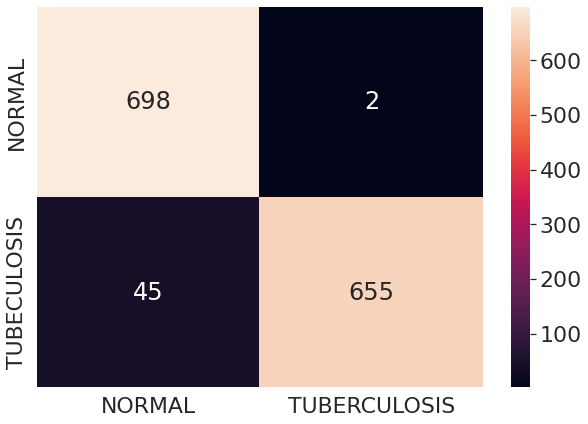

In [10]:
eval_model(model5)

In [11]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

In [13]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [14]:
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [15]:
model5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 regnety040_prestem_rescaling (  (None, 224, 224, 3)  0          ['input_1[0][0]']                
 Rescaling)                                                                                       
                                                                                                  
 regnety040_stem_conv (Conv2D)  (None, 112, 112, 32  864         ['regnety040_prestem_rescaling[0]
                                )                                [0]']                        